# 🚀 Dynamic Pricing Model for Used Cars 💰🚗  

This project is all about creating a **smart pricing system** for used cars, helping **dealerships** and **online platforms** price cars in a way that’s **competitive, fair, and profitable**.  

✅ The goal is to ensure:  
🔹 **Customers** get a good deal 💵  
🔹 **Companies (dealerships)** maximize profits 💰  
🔹 **Prices reflect** both the car's true value and market conditions 📊  

## CRISP-DM Framework

1️⃣ **Business Understanding** – Define the pricing challenges in the used car market. \
2️⃣ **Data Understanding** – Explore the dataset, identify key features, and detect potential issues like missing values. \
3️⃣ **Data Preparation** – Clean, transform, and preprocess data for modeling.  \
4️⃣ **Modeling** – Build predictive models using machine learning techniques to estimate the best car prices. \
5️⃣ **Evaluation** – Assess model performance using accuracy metrics and ensure alignment with business goals.  \
6️⃣ **Deployment** – Implement the model into a real-world system for decision-making.   

This structured approach ensures a **scalable, accurate, and business-impactful solution**.💡   


## 📌 Business Understanding  

#### 1️⃣ Market Overview: Used Car Industry in India  
The used car market in India is growing fast due to:  

- **Affordability** – More middle-class buyers prefer second-hand cars.  
- **Online Marketplaces** – Platforms like OLX, CarDekho, Cars24 make transactions easier.  
- **Unorganized vs. Organized Sector** – Local dealers rely on negotiation, while big platforms struggle with dynamic pricing.  

#### 2️⃣ Key Problems  
- **Overpricing** – Reduces sales and slows inventory movement.  
- **Underpricing** – Leads to revenue loss for dealers.  
- **Slow Sales** – Cars remain unsold, increasing storage costs.  
- **Lack of Price Transparency** – Customers hesitate due to unpredictable pricing.  

#### 3️⃣ Who Benefits?  
- **Dealerships & Online Platforms** – Need a pricing tool to maximize profits while keeping margins hidden.  
- **Car Buyers** – Want fair pricing and transparency.  
- **Car Sellers** – Need competitive pricing to sell their old cars faster.  

#### 4️⃣ Business Benefits  
- **Higher Sales Conversions** (Faster sales with accurate pricing).  
- **Better Profit Margins** (No revenue loss from underpricing).  
- **Optimized Inventory Management** (Reduced holding costs).  
- **Data-Driven Pricing** (Removes manual guesswork).  

#### 5️⃣ How the Model Works  
- **Collects Data** – Car details, demand trends, competitor pricing.  
- **Predicts the Best Price** – Balances market trends & profitability.  
- **Adjusts Pricing Dynamically** – Updates based on demand shifts.  
- **Helps Dealers Make Smarter Decisions** – When to adjust prices for maximum profit.  

#### Conclusion  
Our AI-powered pricing model ensures:  
- **Faster car sales**  
- **Higher profits for dealerships**  
- **Fair pricing for buyers & sellers**


## 📌 Stage 2: Data Understanding

### 1️⃣ Data Sources  
- **Historical Sales Data** – Prices of sold used cars.  
- **Car Specifications** – Make, model, year, fuel type, transmission, condition, etc.  
- Dataset is taken from **Kaggle** platform.


### 🔹 Dataset Features  

- **Brand:** Car manufacturer (e.g., Volkswagen, Maruti Suzuki, Honda, Tata)  
- **Model:** Specific car model (e.g., Taigun, Baleno, Polo, WRV)  
- **Year:** Manufacturing year of the vehicle (ranging from older models to 2024)  
- **Age:** Age of the vehicle in years  
- **kmDriven:** Total kilometers driven by the vehicle  
- **Transmission:** Type of transmission (Manual or Automatic)  
- **Owner:** Ownership status (first or second owner)  
- **FuelType:** Type of fuel (Petrol, Diesel, Hybrid/CNG)  
- **PostedDate:** When the car listing was posted  
- **AdditionalInfo:** Extra details about the vehicle  
- **AskPrice:** Listed price in Indian Rupees (₹)  

In [76]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from itertools import combinations
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
df=pd.read_csv('data/used_car_dataset.csv')
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


### 2️⃣ Exploratory Data Analysis (EDA) Overview  
Before cleaning, we analyze:  

- **Descriptive Statistics:-** \
    ✅ Observations:
    - `Year` (1986 - 2024) → Dataset includes cars from 1986 to 2024.
    - `Age` (0 - 38 years) → Some cars are very old, others are brand new.
- **Categorical Data Analysis:-** \
    ✅ Observations:
    - `Brand` (39 unique values) → 39 different car brands (e.g., Maruti Suzuki is the most frequent).
    - `Model` (400 unique values) → High variety of car models (e.g., City is most common).
    - `Transmission` (2 unique values: Manual, Automatic) → Majority are manual (4666 cars).
    - `Owner` (2 unique values: First, Second) → Most are first-owner (4596 cars).
    - `FuelType` (3 unique values: Petrol, Diesel, Hybrid/CNG) → Diesel is most common (3520 cars).
    - `PostedDate` (12 unique values) → Most listings are recent (Nov-24 is most frequent).
- **Missing Values** – `kmDriven` have some missing values, replaced by median.
- **Outliers & Anomalies** – remove outliers from both `age` and `kmDriven`.
- **Binning of data** - binned data of `Age` and `Year`
- **Log Transformed** - `kmDriven`, `AskPrice`.
- **Feature Relationship** – `Age` and `Year` shows good relationship with `AskPrice`.
- **Feature Distributions Analysis** – checked distribution of `AskPrice`, `Age`, `Year` and `kmDriven`.
- **Removed Duplicate Rows**

In [4]:
# Count duplicate rows
df.duplicated().sum()  

np.int64(724)

In [5]:
# droping the duplicate rows.
df = df.drop_duplicates()

# statistical discription of the data.
df.describe(include='all')

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
count,8858,8858,8858.000000,8858.000000,8812,8858,8858,8858,8858,8858,8858
unique,39,400,NaN,NaN,1910,2,2,3,12,7307,1330
top,Maruti Suzuki,City,NaN,NaN,"65,000 km",Manual,first,Diesel,Nov-24,Good condition,"₹ 4,50,000"
freq,2590,306,NaN,NaN,177,4666,4596,3520,8013,14,124
mean,NaN,NaN,2016.377060,7.622940,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,4.134203,4.134203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1986.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2014.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2017.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2019.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# handling missing values of kmDriven by filling null values by median.
df['kmDriven']=df['kmDriven'].apply(lambda x:str(x).replace(' km','').replace(',','') if x!=None else None).astype(float)
df['kmDriven']=df['kmDriven'].fillna(df['kmDriven'].median())
df['kmDriven'].info()

<class 'pandas.core.series.Series'>
Index: 8858 entries, 0 to 9581
Series name: kmDriven
Non-Null Count  Dtype  
--------------  -----  
8858 non-null   float64
dtypes: float64(1)
memory usage: 138.4 KB


In [7]:
# Owner, AskPrice should be numarical variables.
df['Owner']=df['Owner'].apply(lambda x:x.replace('second', '2').replace('first','1')).astype(float)
df['AskPrice']=df['AskPrice'].apply(lambda x:x.replace('₹','').replace(',','').strip()).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8858 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         8858 non-null   object 
 1   model         8858 non-null   object 
 2   Year          8858 non-null   int64  
 3   Age           8858 non-null   int64  
 4   kmDriven      8858 non-null   float64
 5   Transmission  8858 non-null   object 
 6   Owner         8858 non-null   float64
 7   FuelType      8858 non-null   object 
 8   PostedDate    8858 non-null   object 
 9   AdditionInfo  8858 non-null   object 
 10  AskPrice      8858 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 830.4+ KB


In [8]:
# check value_count of 'Transmission','Owner','FuelType'
df['Transmission'].value_counts()

Transmission
Manual       4666
Automatic    4192
Name: count, dtype: int64

In [9]:
df['Owner'].value_counts()

Owner
1.0    4596
2.0    4262
Name: count, dtype: int64

In [10]:
df['FuelType'].value_counts()

FuelType
Diesel        3520
Petrol        3517
Hybrid/CNG    1821
Name: count, dtype: int64

In [11]:
df['PostedDate'].head()

0    Nov-24
1    Jul-24
2    Nov-24
3    Nov-24
4    Nov-24
Name: PostedDate, dtype: object

In [12]:
df['PostedDate']=df['PostedDate'].apply(lambda x:str(x).split('-')[0])
df['PostedDate'].unique()

array(['Nov', 'Jul', 'Oct', 'Aug', 'Sep', 'May', 'Jun', 'Apr', 'Jan',
       'Feb', 'Dec', 'Mar'], dtype=object)

In [13]:
df.columns

Index(['Brand', 'model', 'Year', 'Age', 'kmDriven', 'Transmission', 'Owner',
       'FuelType', 'PostedDate', 'AdditionInfo', 'AskPrice'],
      dtype='object')

In [14]:
features = ['Brand', 'Year', 'Age', 'Transmission', 'Owner', 'FuelType', 'PostedDate']

In [15]:
def hist(a,b):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=df[a], y=df[b], ci=None)
    plt.xticks(rotation=90)
    plt.show()

#### Age

C:\Users\GAGAN\AppData\Local\Temp\ipykernel_19984\2458579723.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Age'], y=df['AskPrice'], ci=None)


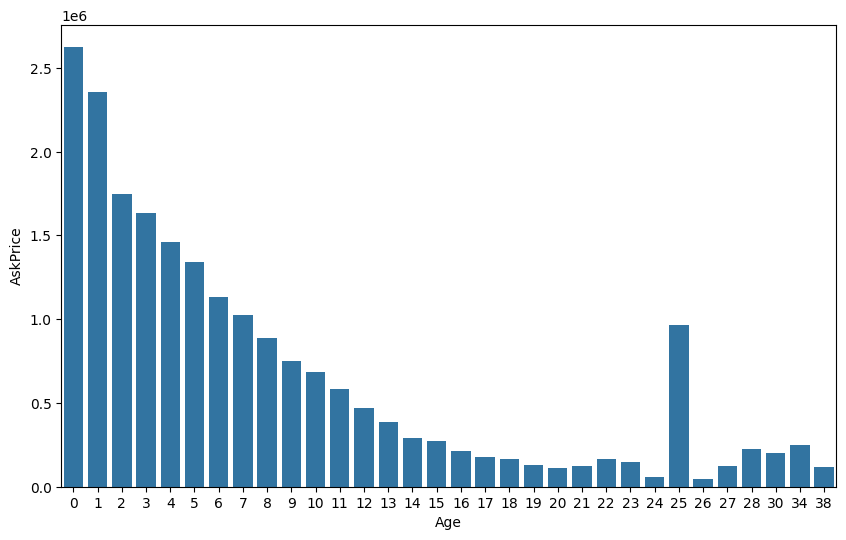

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Age'], y=df['AskPrice'], ci=None)
plt.show()

In [17]:
df[df['Age']==25].count()

Brand           4
model           4
Year            4
Age             4
kmDriven        4
Transmission    4
Owner           4
FuelType        4
PostedDate      4
AdditionInfo    4
AskPrice        4
dtype: int64

In [18]:
df=df[df['Age']!=25]

C:\Users\GAGAN\AppData\Local\Temp\ipykernel_19984\2458579723.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Age'], y=df['AskPrice'], ci=None)


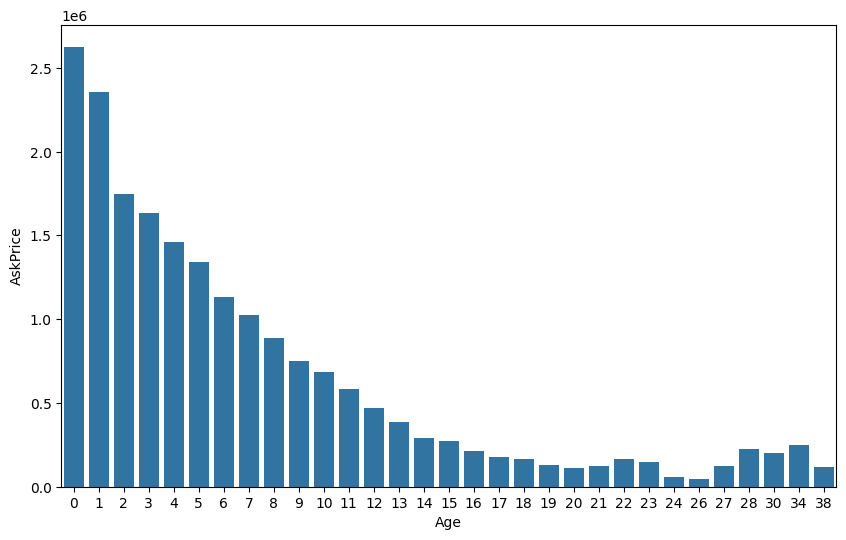

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Age'], y=df['AskPrice'], ci=None)
plt.show()

In [20]:
# trying Binning to regularize data.
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 5, 10, 15, 20, 30, 40], labels=['0-5', '6-10', '11-15', '16-20', '21-30', '31-40'])

C:\Users\GAGAN\AppData\Local\Temp\ipykernel_19984\3595193070.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Age_Group'], y=df['AskPrice'], ci=None)


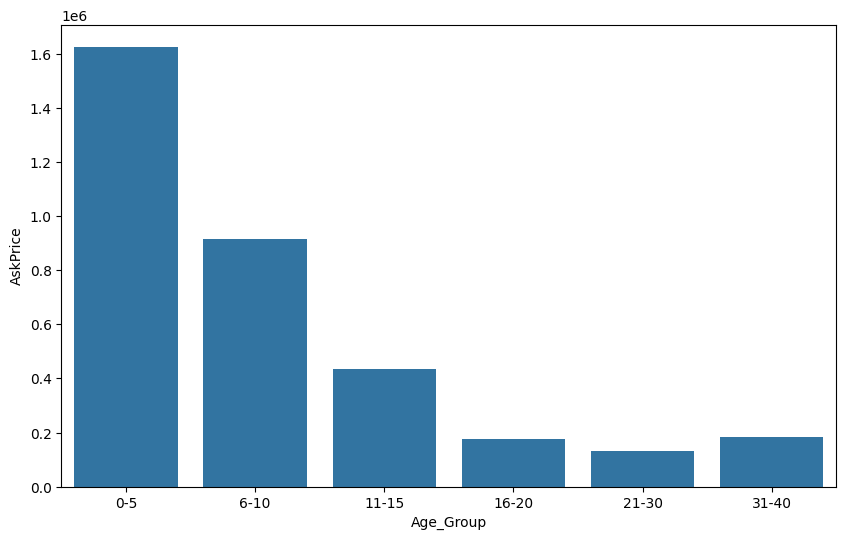

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Age_Group'], y=df['AskPrice'], ci=None)
plt.show()

C:\Users\GAGAN\AppData\Local\Temp\ipykernel_19984\3124061241.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Age_Group_1'], y=df['AskPrice'], ci=None)


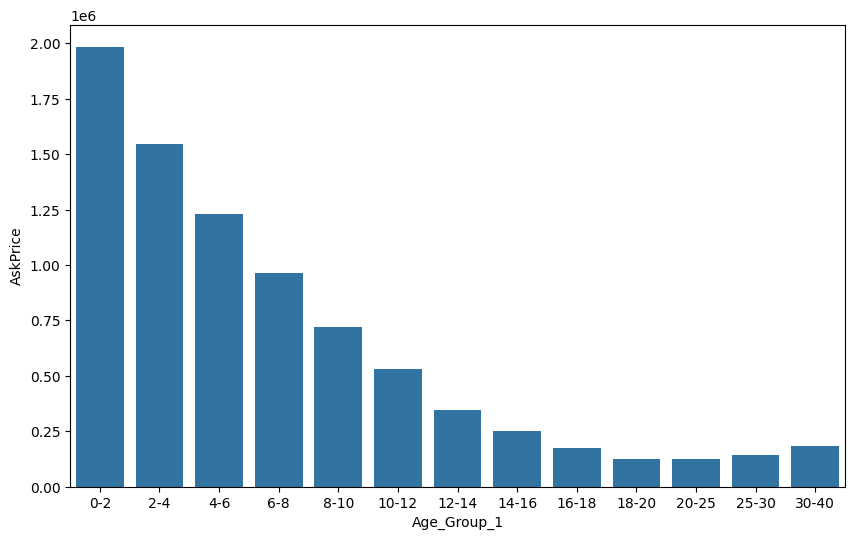

In [22]:
df['Age_Group_1'] = pd.cut(df['Age'], bins=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 25, 30, 40], labels=['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18-20', '20-25', '25-30', '30-40'])
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Age_Group_1'], y=df['AskPrice'], ci=None)
plt.show()

C:\Users\GAGAN\AppData\Local\Temp\ipykernel_19984\3846005976.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Age_Group_2'], y=df['AskPrice'], ci=None)


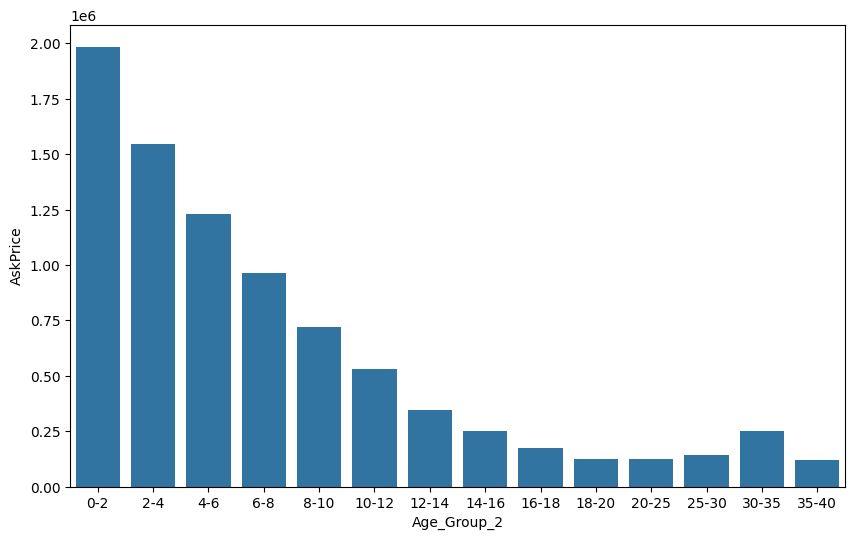

In [23]:
df['Age_Group_2'] = pd.cut(df['Age'], bins=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 25, 30, 35, 40], labels=['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18-20', '20-25', '25-30', '30-35', '35-40'])
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Age_Group_2'], y=df['AskPrice'], ci=None)
plt.show()

In [24]:
# trying polynomial transformation to regularize the data.
poly = PolynomialFeatures(degree=2, include_bias=False)
age_poly = poly.fit_transform(df[['Age']])

C:\Users\GAGAN\AppData\Local\Temp\ipykernel_19984\929003893.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=age_poly_1d, y=df['AskPrice'], ci=None)


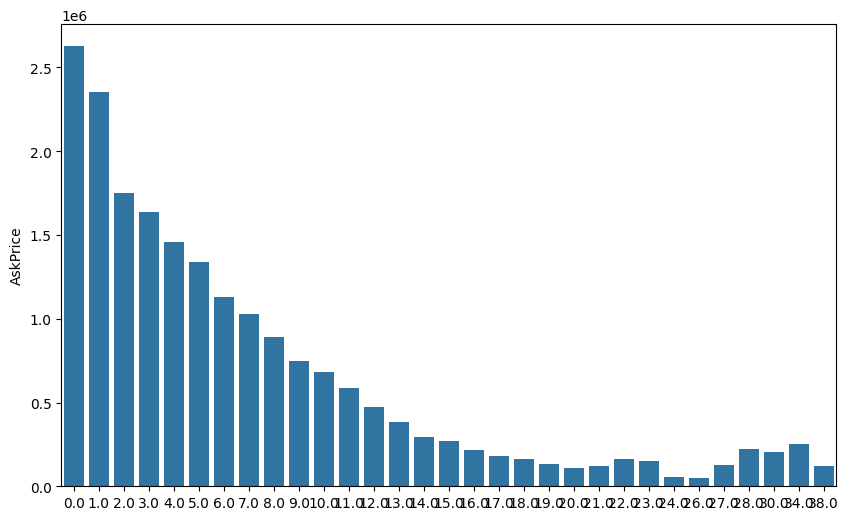

In [25]:
age_poly_1d = age_poly[:, 0] 
plt.figure(figsize=(10, 6))
sns.barplot(x=age_poly_1d, y=df['AskPrice'], ci=None)
plt.show()

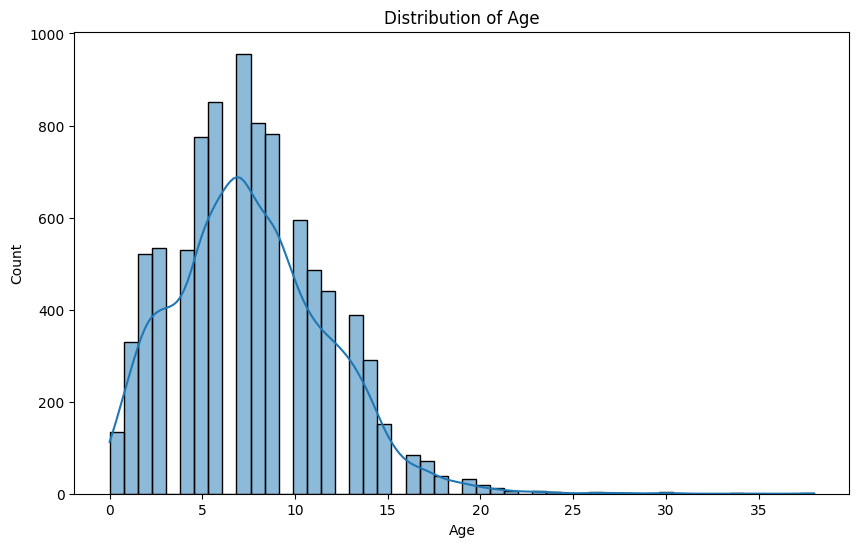

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=50, kde=True)
plt.title("Distribution of Age")
plt.show()

#### Brand

C:\Users\GAGAN\AppData\Local\Temp\ipykernel_19984\2322744278.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Brand'], y=df['AskPrice'], ci=None)


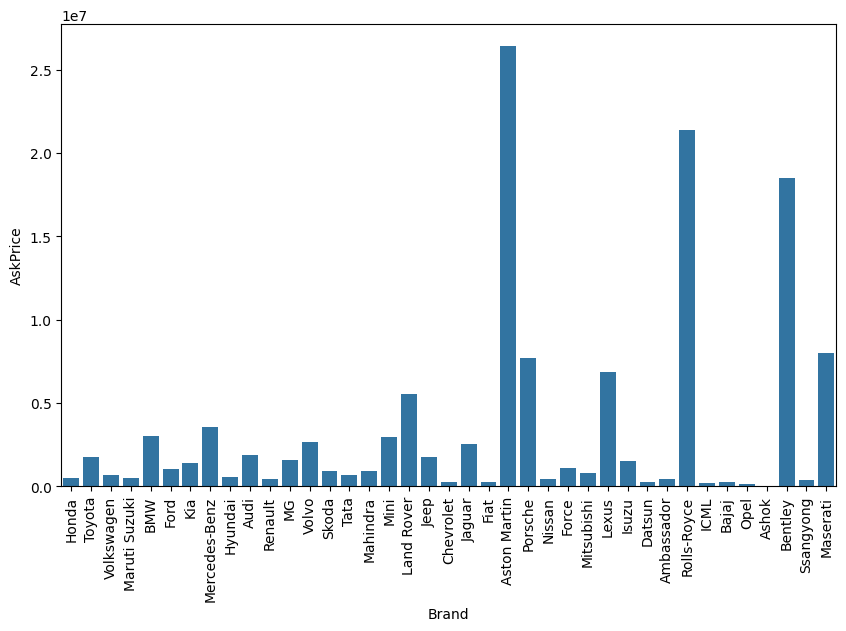

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Brand'], y=df['AskPrice'], ci=None)
plt.xticks(rotation=90)
plt.show()

#### Year

C:\Users\GAGAN\AppData\Local\Temp\ipykernel_19984\2005862835.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Year'], y=df['AskPrice'], ci=None)


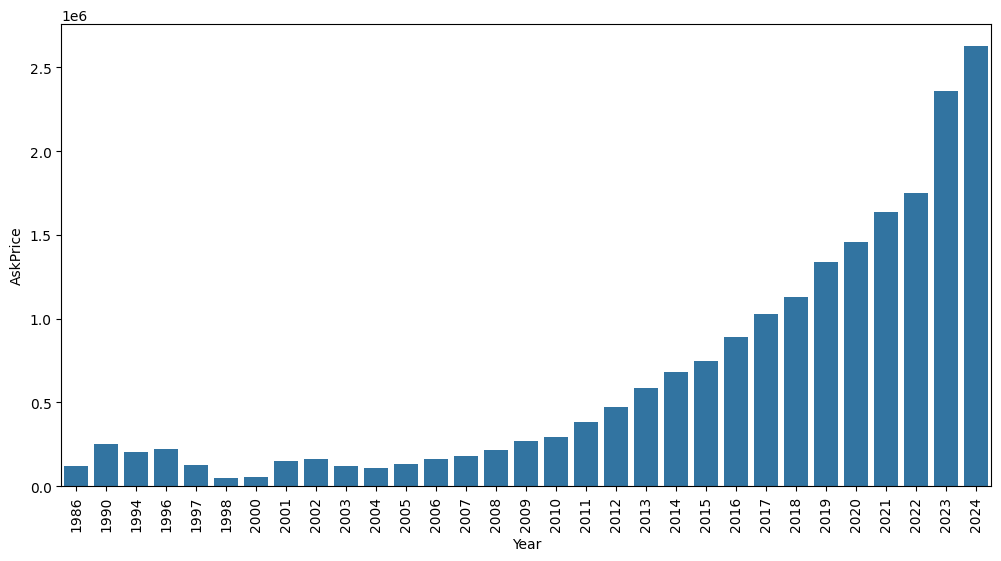

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Year'], y=df['AskPrice'], ci=None)
plt.xticks(rotation=90)
plt.show()

In [29]:
all_years = np.arange(df['Year'].min(), df['Year'].max() + 1)
missing_years = set(all_years) - set(df['Year'].unique())

print("Missing Years:", missing_years)

Missing Years: {np.int64(1987), np.int64(1988), np.int64(1989), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1995), np.int64(1999)}


In [30]:
bins = [1986, 1991, 1995, 1999, 2000] + list(range(2002, 2026, 2))

# Assign labels for the bins
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]

# Create a new column for the binned year categories
df['Year_Bin'] = pd.cut(df['Year'], bins=bins, labels=labels, right=False)


C:\Users\GAGAN\AppData\Local\Temp\ipykernel_19984\2682728385.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Year_Bin'], y=df['AskPrice'], ci=None)


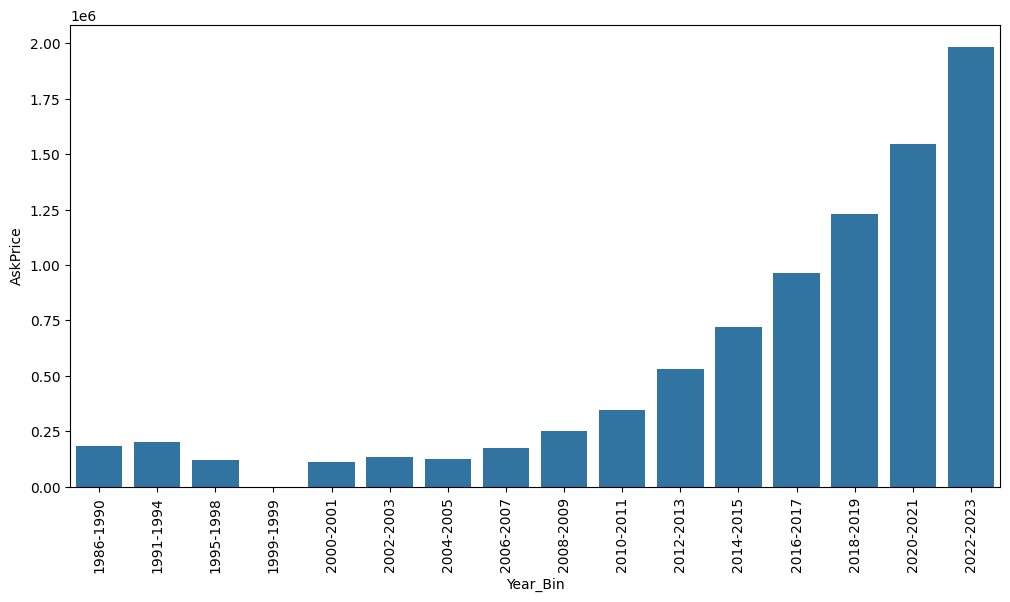

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Year_Bin'], y=df['AskPrice'], ci=None)
plt.xticks(rotation=90)
plt.show()

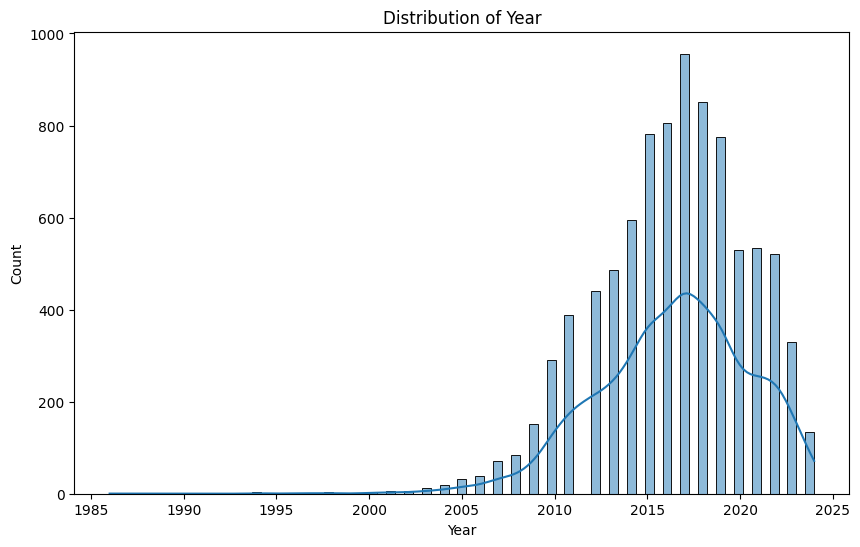

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Year'], kde=True)
plt.title("Distribution of Year")
plt.show()

#### kmDriven

In [33]:
df['kmDriven'].unique()

array([ 98000., 190000.,  77246., ..., 243000.,  43700.,  83228.],
      shape=(1746,))

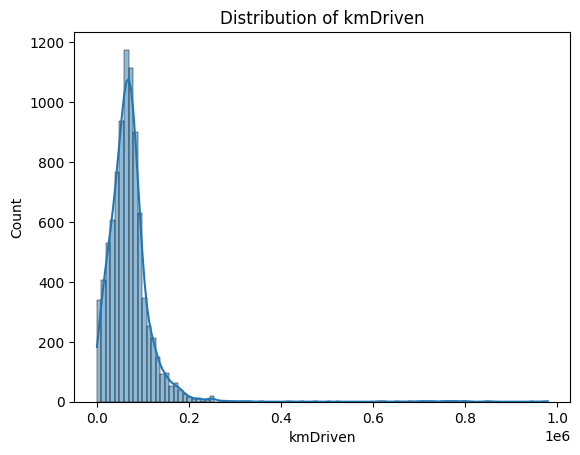

In [34]:
sns.histplot(df['kmDriven'], bins=100, kde=True)
plt.title("Distribution of kmDriven")
plt.show()

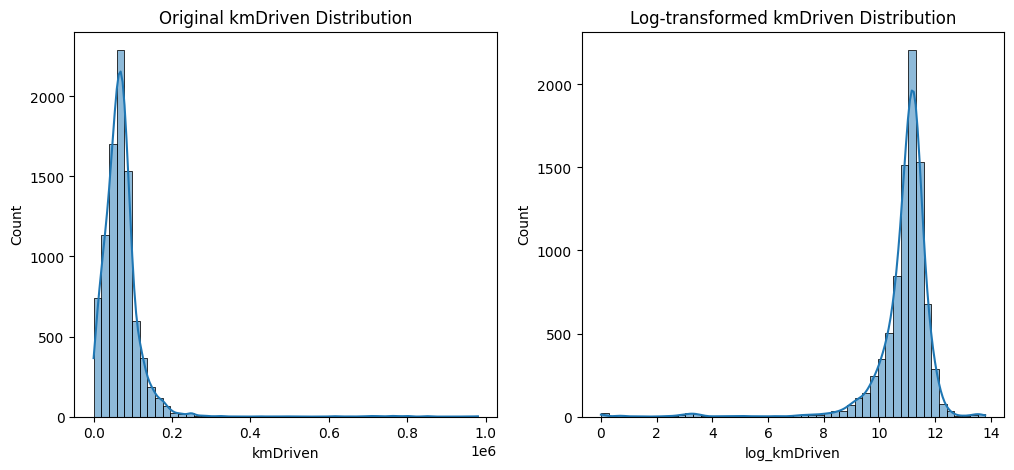

In [35]:
df['log_kmDriven'] = np.log1p(df['kmDriven'])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original kmDriven distribution
sns.histplot(df['kmDriven'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Original kmDriven Distribution")

# Log-transformed kmDriven distribution
sns.histplot(df['log_kmDriven'], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Log-transformed kmDriven Distribution")

plt.show()

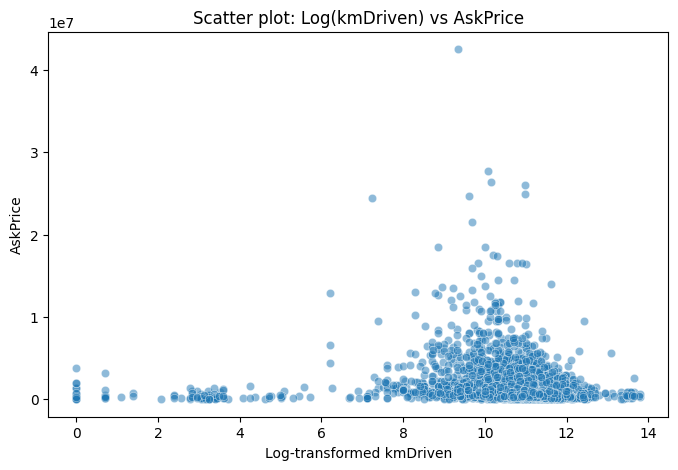

In [36]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['log_kmDriven'], y=df['AskPrice'], alpha=0.5)
plt.xlabel("Log-transformed kmDriven")
plt.ylabel("AskPrice")
plt.title("Scatter plot: Log(kmDriven) vs AskPrice")
plt.show()

<Axes: xlabel='log_kmDriven', ylabel='AskPrice'>

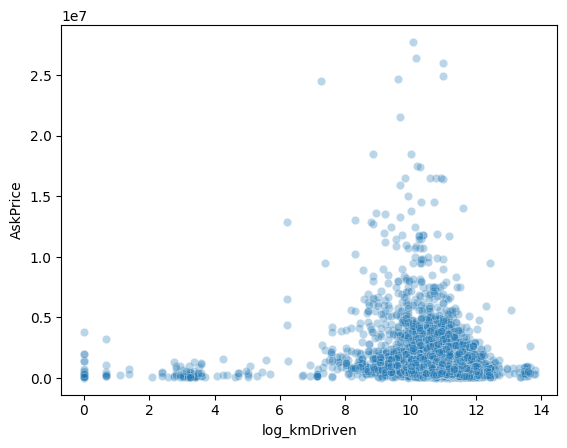

In [37]:
df = df[df['AskPrice'] < 3e7]  # Adjust threshold as needed
sns.scatterplot(x=df['log_kmDriven'], y=df['AskPrice'], alpha=0.3)

#### PostedDate

In [38]:
df= df.rename(columns={'PostedDate':'PostedMonth'})
df.columns

Index(['Brand', 'model', 'Year', 'Age', 'kmDriven', 'Transmission', 'Owner',
       'FuelType', 'PostedMonth', 'AdditionInfo', 'AskPrice', 'Age_Group',
       'Age_Group_1', 'Age_Group_2', 'Year_Bin', 'log_kmDriven'],
      dtype='object')

C:\Users\GAGAN\AppData\Local\Temp\ipykernel_19984\3592673384.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['PostedMonth'], y=df['AskPrice'], ci=None)


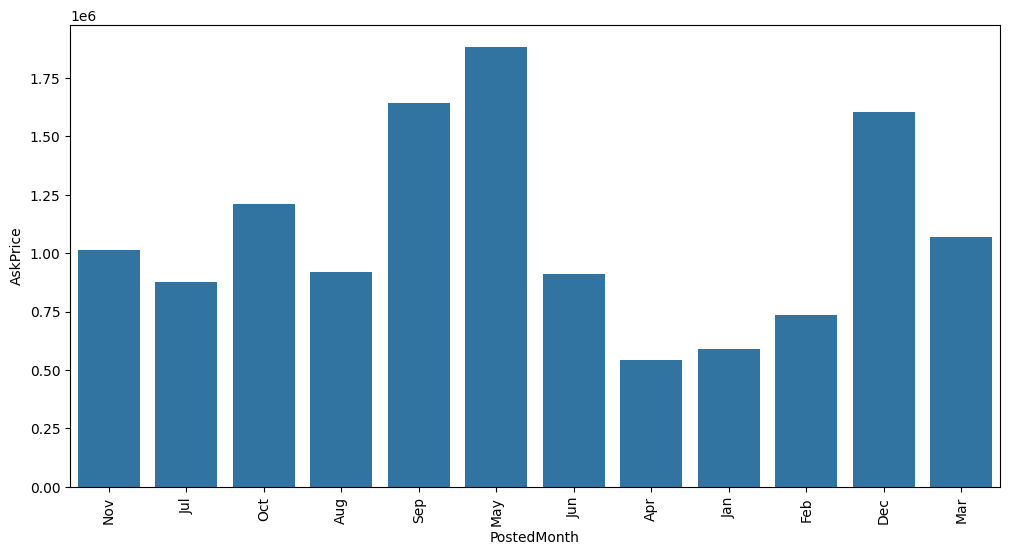

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['PostedMonth'], y=df['AskPrice'], ci=None)
plt.xticks(rotation=90)
plt.show()

In [40]:
df['AdditionInfo'].unique().tolist()

['Honda City v teck in mint condition, valid genuine car,',
 'Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, Diesel',
 'Volkswagen Vento 2010-2013 Diesel Breeze, 2010, Diesel',
 'Maruti Suzuki Swift 2017 Diesel Good Condition',
 'Maruti Suzuki Baleno Alpha CVT, 2019, Petrol',
 'BMW X3 2.0 XDRIVE 20D, 2014, Diesel',
 'Toyota Innova 2.5 VX 8 Seater BS IV, 2014, Diesel',
 'BMW 5 Series 3.0 530D M Sport, 2019, Diesel',
 'Maruti Suzuki Dzire 1.2 VXI, 2020, Petrol',
 'Ford Ecosport 1.5 Ti VCT MT Titanium BE, 2017, Petrol',
 'Maruti Suzuki Alto K10 VXI Airbag, 2018, Petrol',
 'Kia Carnival Premium 8 STR, 2021, Diesel',
 'Maruti Suzuki Swift Dzire VXI 1.2, 2012, Petrol',
 'Top End Fully Loaded Automatic  Corolla with  Advanced Seq. CNG',
 'Mercedes-Benz GLE COUPE 3.0 53 AMG 4MATIC Plus, 2021, Petrol',
 'Hyundai Xcent S 1.2 OPT, 2018, Diesel',
 'Kia Seltos HTK Plus D, 2020, Diesel',
 'Maruti Suzuki Ertiga VDI SHVS, 2016, Diesel',
 'Maruti Suzuki Ertiga 2017 Petrol 59000 Km Driven',
 'BMW 3 Series

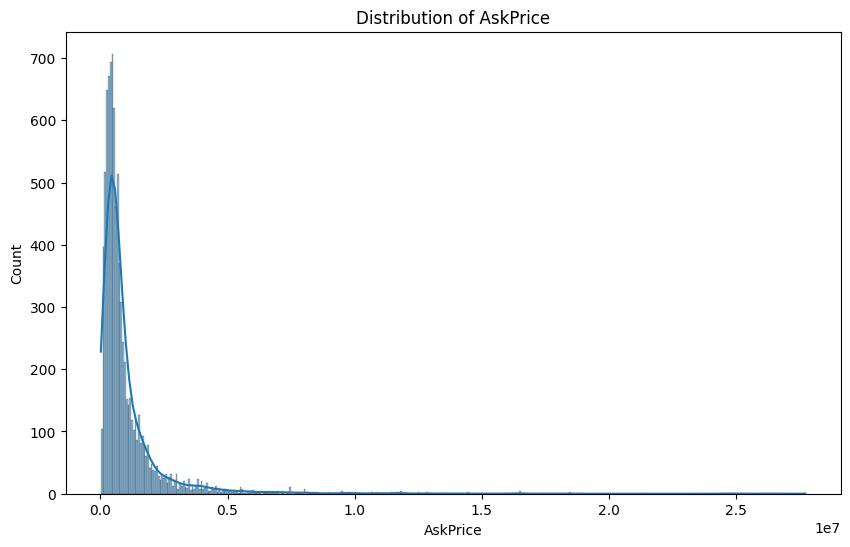

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AskPrice'], kde=True)
plt.title("Distribution of AskPrice")
plt.show()

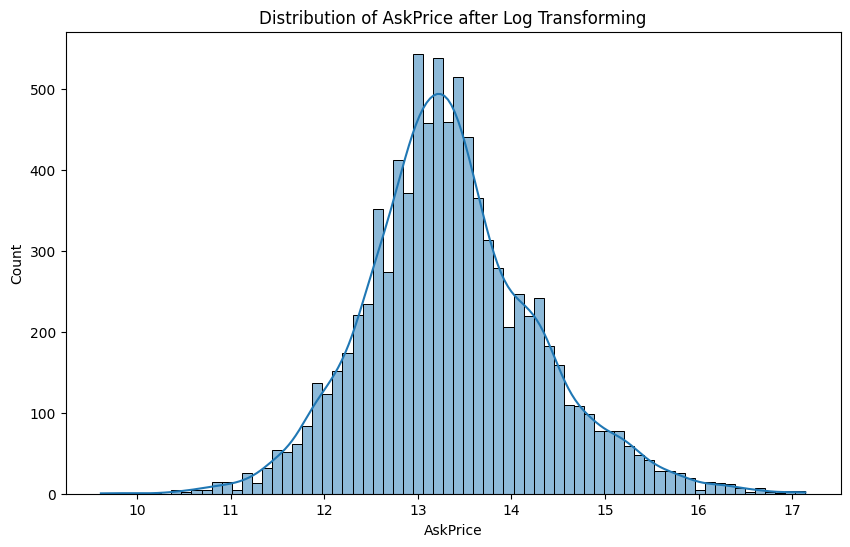

In [42]:
df['AskPrice']= np.log1p(df['AskPrice'])

plt.figure(figsize=(10, 6))
sns.histplot(df['AskPrice'], kde=True)
plt.title("Distribution of AskPrice after Log Transforming")
plt.show()

## 📌 Stage 3: Data Preparation  

### 1️⃣ Feature Selection

In [43]:
df.columns

Index(['Brand', 'model', 'Year', 'Age', 'kmDriven', 'Transmission', 'Owner',
       'FuelType', 'PostedMonth', 'AdditionInfo', 'AskPrice', 'Age_Group',
       'Age_Group_1', 'Age_Group_2', 'Year_Bin', 'log_kmDriven'],
      dtype='object')

In [44]:
new_df = df[['Brand', 'Year', 'Age', 'log_kmDriven', 'Transmission', 'Owner', 'FuelType', 'PostedMonth', 'AskPrice']]

### 2️⃣ Feature Engineering  
#### 🔹 Encoding Categorical Variables  
`Brand`, `Transmission`, `FuelType`, `PostedMonth`

In [45]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8853 entries, 0 to 9581
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         8853 non-null   object 
 1   Year          8853 non-null   int64  
 2   Age           8853 non-null   int64  
 3   log_kmDriven  8853 non-null   float64
 4   Transmission  8853 non-null   object 
 5   Owner         8853 non-null   float64
 6   FuelType      8853 non-null   object 
 7   PostedMonth   8853 non-null   object 
 8   AskPrice      8853 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 691.6+ KB


In [46]:
encoded_df = new_df.copy()

label_cols = ['Brand', 'Transmission', 'FuelType', 'PostedMonth']

encoder = LabelEncoder()
for col in label_cols:
    encoded_df[col] = encoder.fit_transform(encoded_df[col])

encoded_df.head()


,Brand,Year,Age,log_kmDriven,Transmission,Owner,FuelType,PostedMonth,AskPrice
0,12,2001,23,11.492733,1,2.0,2,9,12.180760
1,36,2009,15,12.154785,1,2.0,0,5,12.834684
2,37,2010,14,11.254763,1,1.0,0,9,12.128111
3,23,2017,7,11.332614,1,2.0,0,9,13.244583
4,23,2019,5,10.714440,0,1.0,2,9,13.437176


In [47]:
encoded_df['Owner']=encoded_df['Owner'].astype(int)

In [48]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8853 entries, 0 to 9581
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         8853 non-null   int64  
 1   Year          8853 non-null   int64  
 2   Age           8853 non-null   int64  
 3   log_kmDriven  8853 non-null   float64
 4   Transmission  8853 non-null   int64  
 5   Owner         8853 non-null   int64  
 6   FuelType      8853 non-null   int64  
 7   PostedMonth   8853 non-null   int64  
 8   AskPrice      8853 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 691.6 KB


## 4️⃣ Data Splitting  
- **Train-Test Split** – 80% for training, 20% for testing.  

In [49]:
X = encoded_df.drop(columns=['AskPrice']) 
y = encoded_df['AskPrice']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")


Training Set: (7082, 8), Testing Set: (1771, 8)


## 📌 Stage 4: Modeling

### 1️⃣ Choosing the Right Model  
Since we are predicting car prices (a continuous variable), this is a regression problem. Possible models:  

- **Simple Linear Regression**
- **Multiple Linear Regression**
- **polynomial Non-Linear Regression**

In [50]:
mlr=LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred= mlr.predict(X_test)

In [52]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Multiple Linear Regression Results:\nMAE: {mae:.2f}, MSE: {mse:.2f}, R2 Score: {r2:.2f}")

Multiple Linear Regression Results:
MAE: 0.49, MSE: 0.46, R2 Score: 0.51


In [67]:
features = ['Brand', 'Year', 'Age', 'log_kmDriven', 'Transmission', 'Owner', 'FuelType', 'PostedMonth']
best_results = []
count=0

for r in range(1, len(features) + 1):
    feature_combinations = list(combinations(features, r))

    for feature_set in feature_combinations:
        feature_list = list(feature_set)

        X = encoded_df[feature_list]
        y = encoded_df['AskPrice']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = LinearRegression()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        count+=1

        best_results.append((feature_list, {'MAE': mae, 'MSE': mse, 'R2 Score': r2}))

best_results.sort(key=lambda x: (x[1]['MAE'], x[1]['MSE'], -x[1]['R2 Score'], len(x[0])))

print("\n🚀 Top 5 Optimized Feature Combinations (Multiple Linear Regression):\n")
for i, (features, metrics) in enumerate(best_results[:5]):
    print(f"#{i+1}: Features: {features} | R² Score: {metrics['R2 Score']:.4f} | MAE: {metrics['MAE']:.4f} | MSE: {metrics['MSE']:.4f}")

print(count)


🚀 Top 5 Optimized Feature Combinations (Multiple Linear Regression):

#1: Features: ['Brand', 'Year', 'log_kmDriven', 'Transmission', 'Owner', 'FuelType'] | R² Score: 0.5061 | MAE: 0.4860 | MSE: 0.4624
#2: Features: ['Brand', 'Year', 'Age', 'log_kmDriven', 'Transmission', 'Owner', 'FuelType'] | R² Score: 0.5061 | MAE: 0.4860 | MSE: 0.4624
#3: Features: ['Brand', 'Age', 'log_kmDriven', 'Transmission', 'Owner', 'FuelType'] | R² Score: 0.5061 | MAE: 0.4860 | MSE: 0.4624
#4: Features: ['Age', 'log_kmDriven', 'Transmission', 'Owner', 'FuelType'] | R² Score: 0.5059 | MAE: 0.4860 | MSE: 0.4626
#5: Features: ['Year', 'Age', 'log_kmDriven', 'Transmission', 'Owner', 'FuelType'] | R² Score: 0.5059 | MAE: 0.4860 | MSE: 0.4626
255


In [53]:
poly = PolynomialFeatures(degree=2, include_bias=False)  # Avoid unnecessary bias term
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred = poly_model.predict(X_test_poly)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Polynomial Regression (Degree 2) Results:\nMAE: {mae:.2f}, MSE: {mse:.2f}, R2 Score: {r2:.2f}")


Polynomial Regression (Degree 2) Results:
MAE: 0.44, MSE: 0.39, R2 Score: 0.58


In [57]:
encoded_df.columns

Index(['Brand', 'Year', 'Age', 'log_kmDriven', 'Transmission', 'Owner',
       'FuelType', 'PostedMonth', 'AskPrice'],
      dtype='object')

In [ ]:
features = ['Brand', 'Year', 'Age', 'log_kmDriven', 'Transmission', 'Owner', 'FuelType', 'PostedMonth']
best_results = []
count=0

for r in range(1, len(features) + 1):
    feature_combinations = list(combinations(features, r))

    for feature_set in feature_combinations:
        feature_list = list(feature_set)
        
        X = encoded_df[feature_list]
        y = encoded_df['AskPrice']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        poly = PolynomialFeatures(degree=2, include_bias=False)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        y_pred = model.predict(X_test_poly)
        
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        count+=1
        
        best_results.append((feature_list, {'MAE': mae, 'MSE': mse, 'R2 Score': r2}))

best_results.sort(key=lambda x: (x[1]['MAE'], x[1]['MSE'], -x[1]['R2 Score'], len(x[0])))

print("\n🚀 Top 5 Optimized Feature Combinations (Sorted by MAE, MSE, R², Feature Count):\n")
for i, (features, metrics) in enumerate(best_results[:5]):
    print(f"#{i+1}: Features: {features} | R² Score: {metrics['R2 Score']:.4f} | MAE: {metrics['MAE']:.4f} | MSE: {metrics['MSE']:.4f}")

print('count:',count)


🚀 Top 5 Optimized Feature Combinations (Sorted by MAE, MSE, R², Feature Count):

#1: Features: ['Brand', 'Year', 'Transmission', 'Owner', 'FuelType', 'PostedMonth'] | R² Score: 0.5796 | MAE: 0.4344 | MSE: 0.3936
#2: Features: ['Brand', 'Age', 'Transmission', 'Owner', 'FuelType', 'PostedMonth'] | R² Score: 0.5796 | MAE: 0.4344 | MSE: 0.3936
#3: Features: ['Brand', 'Year', 'Age', 'Transmission', 'Owner', 'FuelType', 'PostedMonth'] | R² Score: 0.5796 | MAE: 0.4344 | MSE: 0.3936
#4: Features: ['Brand', 'Year', 'Transmission', 'FuelType', 'PostedMonth'] | R² Score: 0.5793 | MAE: 0.4345 | MSE: 0.3939
#5: Features: ['Brand', 'Year', 'Age', 'Transmission', 'FuelType', 'PostedMonth'] | R² Score: 0.5793 | MAE: 0.4345 | MSE: 0.3939
count:  255


## 2️⃣ Model Training & Hyperparameter Tuning

* Use Grid Search to find the best model parameters.
* Uses Regularization (Lasso/Ridge) to prevent overfitting.

## 3️⃣ Feature Selection

* Remove irrelevant or highly correlated features to improved model performance.

In [74]:
features= ['Brand', 'Year', 'Transmission', 'Owner', 'FuelType', 'PostedMonth']
X= encoded_df[features]
y= encoded_df['AskPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {'alpha': np.logspace(-5, 5, 20)}

ridge= Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1) 
grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
best_ridge = grid_search.best_estimator_

y_pred = best_ridge.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Alpha: {best_alpha}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R^2): {r2}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Alpha: 6.1584821106602545
Mean Squared Error (MSE): 0.46284336379368923
Mean Absolute Error (MAE): 0.4865386765859025
R-squared (R^2): 0.5056592143657332


In [75]:
X = encoded_df[['Brand', 'Year', 'Age', 'log_kmDriven', 'Transmission', 'Owner', 'FuelType', 'PostedMonth']]
y = encoded_df['AskPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)
y_pred_mlr = mlr_model.predict(X_test)

mlr_metrics = {
    "Model": "Multiple Linear Regression",
    "R2 Score": r2_score(y_test, y_pred_mlr),
    "MAE": mean_absolute_error(y_test, y_pred_mlr),
    "MSE": mean_squared_error(y_test, y_pred_mlr)
}

pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  # Polynomial Feature Transformer
    ('model', LinearRegression())    # Linear Regression Model
])

# Hyperparameter Grid
param_grid = {
    'poly__degree': [2, 3, 4]  
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get Best Model from Grid Search
best_poly_model = grid_search.best_estimator_
y_pred_poly = best_poly_model.predict(X_test)

poly_metrics = {
    "Model": f"Polynomial Regression (Degree {grid_search.best_params_['poly__degree']})",
    "R2 Score": r2_score(y_test, y_pred_poly),
    "MAE": mean_absolute_error(y_test, y_pred_poly),
    "MSE": mean_squared_error(y_test, y_pred_poly)
}

results = [mlr_metrics, poly_metrics]
best_model = max(results, key=lambda x: x["R2 Score"])  # Select model with highest R²

print("\n🚀 Model Comparison:")
for res in results:
    print(f"\n🔹 {res['Model']}")
    print(f"   - R² Score: {res['R2 Score']:.4f}")
    print(f"   - MAE: {res['MAE']:.4f}")
    print(f"   - MSE: {res['MSE']:.4f}")

print(f"\n✅ Best Model: {best_model['Model']} (Highest R²: {best_model['R2 Score']:.4f})")


🚀 Model Comparison:

🔹 Multiple Linear Regression
   - R² Score: 0.5058
   - MAE: 0.4864
   - MSE: 0.4627

🔹 Polynomial Regression (Degree 2)
   - R² Score: 0.5800
   - MAE: 0.4359
   - MSE: 0.3933

✅ Best Model: Polynomial Regression (Degree 2) (Highest R²: 0.5800)


## 5️⃣ Performance Metrics

Evaluated models using:

* **MAE (Mean Absolute Error)** – 0.4359
* **MSE (Mean Squared Error)** – 0.3933
* **R² Score** – 0.5800

## Deployment

In [77]:
with open("model.pkl", "wb") as file:  
    pickle.dump(model, file)  # Save the model